In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_communities
from collections import Counter
from algorithms import GAE
from torch.nn.functional import binary_cross_entropy
from node2vec import Node2Vec
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
file_path = '../data/stanford/web-Stanford.txt'

# Initialize an empty directed graph
G = nx.DiGraph()

with open(file_path, 'r') as file:
    for line in file:
        # Skip comments and empty lines
        if line.startswith('#') or not line.strip():
            continue

        # Build graph
        source, target = line.strip().split()[:2]
        G.add_edge(source, target)

print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loaded graph with 281903 nodes and 2312497 edges.


In [3]:
# Basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")


Number of nodes: 281903
Number of edges: 2312497
Is the graph directed: True


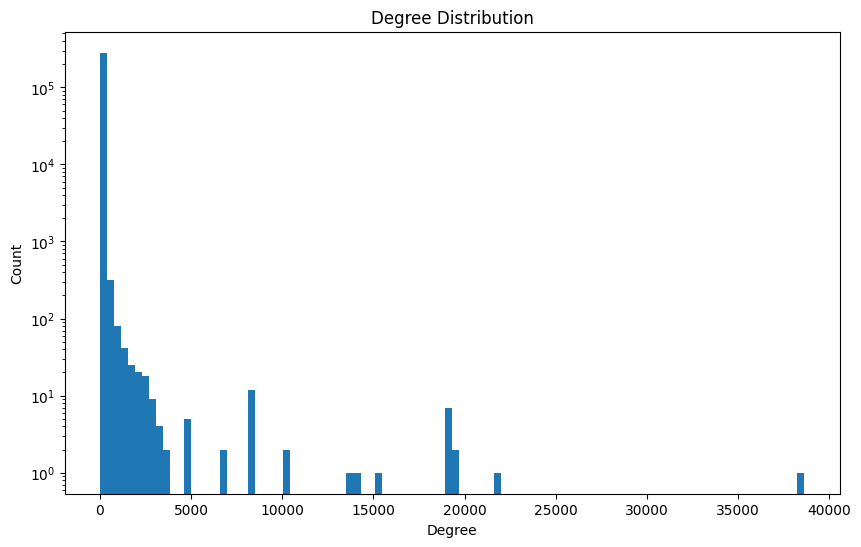

In [4]:
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, log=True)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


In [5]:
# Strongly connected components
strongly_connected_components = nx.strongly_connected_components(G)
largest_scc = max(strongly_connected_components, key=len)
print(f"Number of nodes in the largest strongly connected component: {len(largest_scc)}")

# Weakly connected components
weakly_connected_components = nx.weakly_connected_components(G)
largest_wcc = max(weakly_connected_components, key=len)
print(f"Number of nodes in the largest weakly connected component: {len(largest_wcc)}")


Number of nodes in the largest strongly connected component: 150532
Number of nodes in the largest weakly connected component: 255265


In [6]:
# Compute PageRank for the nodes in the graph
pagerank = nx.pagerank(G, max_iter=100)

# Identify the node with the highest PageRank
max_pagerank_node = max(pagerank, key=pagerank.get)
max_pagerank = pagerank[max_pagerank_node]

print(f"Node with highest PageRank: {max_pagerank_node}, PageRank: {max_pagerank}")


Node with highest PageRank: 89073, PageRank: 0.010006381216752553


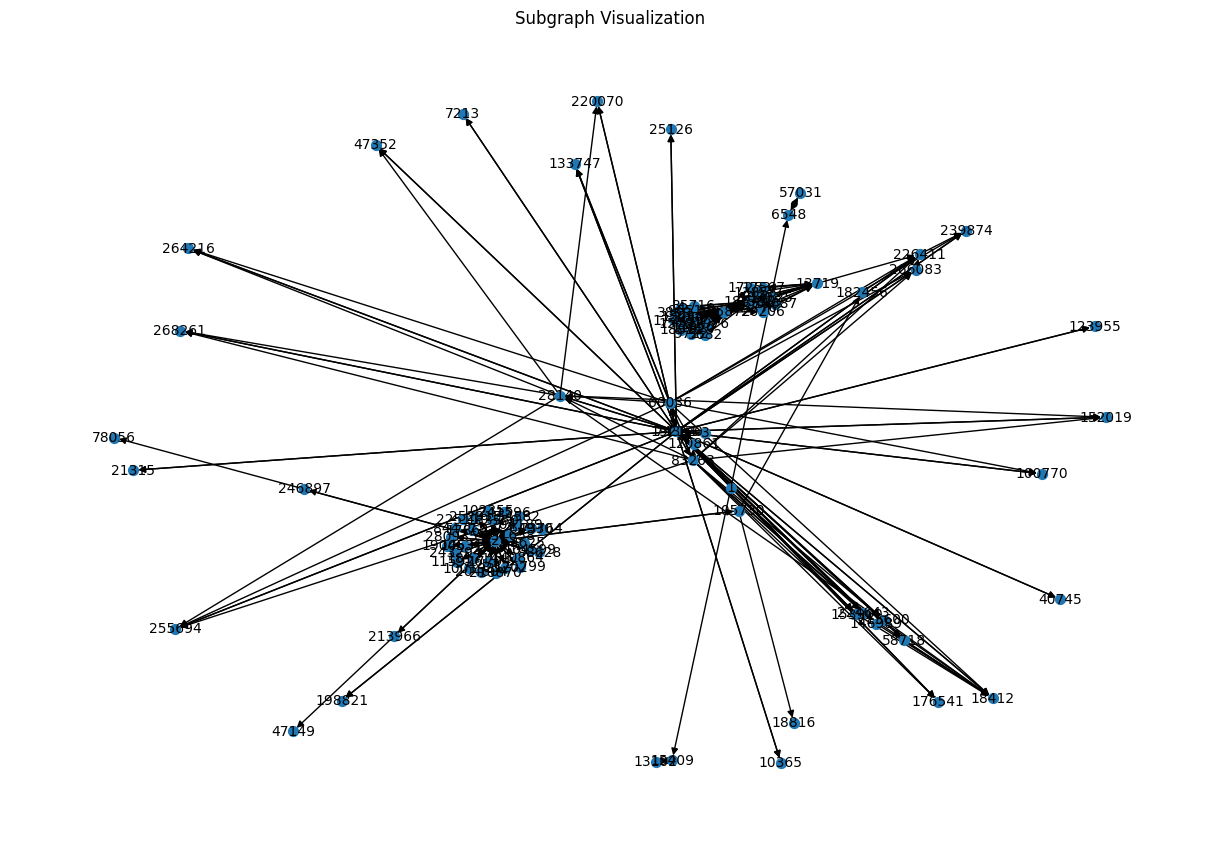

In [7]:
# Visualize a subgraph of the first 100 nodes
subgraph_nodes = list(G.nodes())[:100]
H = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=50, font_size=10)
plt.title("Subgraph Visualization")
plt.show()


# Louvain

In [9]:
# Convert to undirected graph for Louvain method
G_undirected = G.to_undirected()

# Run Louvain community detection
#louvain_communities(G, weight='weight', resolution=1, threshold=1e-07, seed=None)
#  PARAMETERS
#    G - NetworkX graph
#    weight -string or None, optional (default=”weight”) The name of an edge attribute that holds the numerical value used as a weight. If None then each edge has weight 1.
#    resolution - float, optional (default=1) If resolution is less than 1, the algorithm favors larger communities. Greater than 1 favors smaller communities
#    threshold - float, optional (default=0.0000001) Modularity gain threshold for each level. If the gain of modularity between 2 levels of the algorithm is less than the given threshold then the algorithm stops and returns the resulting communities.
#    seed - integer, random_state, or None (default) Indicator of random number generation state. See Randomness.

communities = louvain_communities(G_undirected, resolution=1, threshold=1e-07)
#Returns:list - A list of sets (partition of G). Each set represents one community and contains all the nodes that constitute it.

communities_sizes = []
# Display the communities
for i, community in enumerate(communities):
    communities_sizes.append(len(community))
    print(f"Community {i}: Size {len(community)}")
    # Print some nodes of the community
    print(f"Nodes: {list(community)[:5]}")  # Show first 5 nodes as an example


Community 0: Size 2678
Nodes: ['193202', '113049', '202574', '71994', '248194']
Community 1: Size 4
Nodes: ['180949', '41825', '76448', '13']
Community 2: Size 386
Nodes: ['83846', '113388', '111682', '226580', '232795']
Community 3: Size 26
Nodes: ['30', '15405', '31084', '6551', '68183']
Community 4: Size 414
Nodes: ['139326', '99231', '22853', '155339', '166648']
Community 5: Size 1518
Nodes: ['67831', '78992', '71678', '60648', '126212']
Community 6: Size 1246
Nodes: ['192422', '247313', '8038', '254580', '79645']
Community 7: Size 71
Nodes: ['279636', '69883', '171845', '277499', '202808']
Community 8: Size 59
Nodes: ['85380', '25353', '119487', '13836', '275425']
Community 9: Size 109
Nodes: ['65266', '85390', '28735', '155794', '44364']
Community 10: Size 15
Nodes: ['105220', '26415', '89748', '15441', '13033']
Community 11: Size 73
Nodes: ['23567', '57276', '260542', '44538', '132361']
Community 12: Size 20
Nodes: ['126277', '87942', '175', '72379', '27653']
Community 13: Size 

In [12]:
communities_sizes = []
# Display the communities
for i, community in enumerate(communities):
    communities_sizes.append(len(community))
    print(f"Community {i}: Size {len(community)}")
    # Print some nodes of the community
    print(f"Nodes: {list(community)[:5]}")  # Show first 5 nodes as an example

Community 0: Size 6673
Nodes: ['108307', '3844', '273570', '131196', '66425']
Community 1: Size 2672
Nodes: ['196761', '271331', '99283', '163785', '254296']
Community 2: Size 4
Nodes: ['41825', '180949', '76448', '13']
Community 3: Size 5756
Nodes: ['123637', '116872', '98852', '174831', '162878']
Community 4: Size 111
Nodes: ['185846', '183607', '169215', '254483', '173701']
Community 5: Size 386
Nodes: ['161309', '81284', '205291', '195916', '8027']
Community 6: Size 70
Nodes: ['262665', '165561', '164345', '175595', '95919']
Community 7: Size 53
Nodes: ['75629', '28671', '26361', '43034', '103253']
Community 8: Size 261
Nodes: ['12059', '235059', '169258', '255238', '18351']
Community 9: Size 47
Nodes: ['31023', '20015', '43452', '145017', '32694']
Community 10: Size 175
Nodes: ['5737', '17301', '114325', '130750', '154017']
Community 11: Size 1072
Nodes: ['187624', '114447', '127815', '104717', '17798']
Community 12: Size 314
Nodes: ['139475', '123603', '255045', '166661', '236800

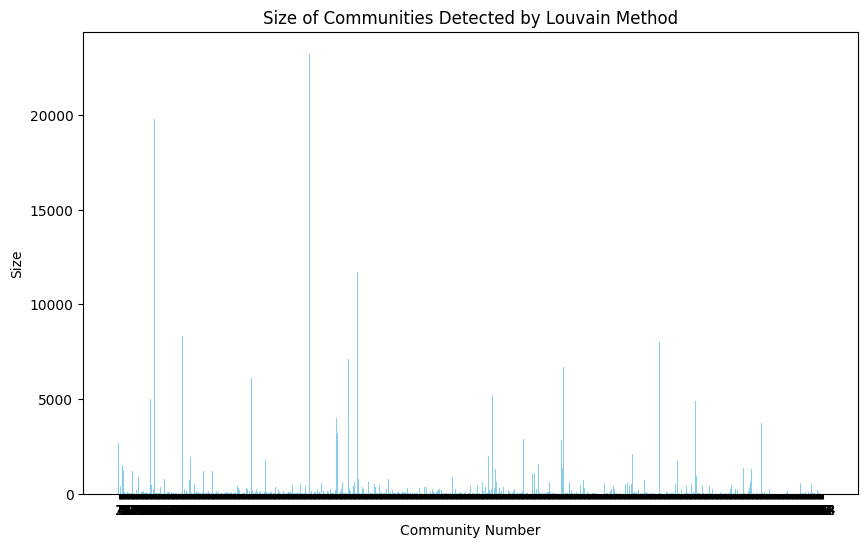

In [10]:

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(communities_sizes)), communities_sizes, color='skyblue')
plt.xlabel('Community Number')
plt.ylabel('Size')
plt.title('Size of Communities Detected by Louvain Method')
plt.xticks(range(len(communities_sizes)), [f"{i+1}" for i in range(len(communities_sizes))])
plt.show()

Number of Communities 864


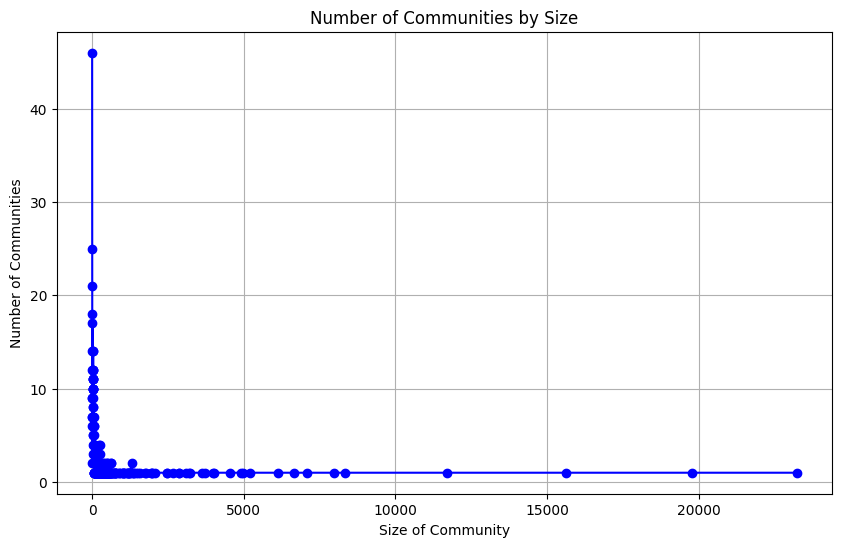

In [11]:
print('Number of Communities', len(communities_sizes))

# Counting the number of communities of each size
size_counts = Counter(communities_sizes)

# Sorting the sizes for plotting
sorted_sizes = sorted(size_counts.keys())
counts = [size_counts[size] for size in sorted_sizes]

# Plotting the number of communities by their size
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, counts, marker='o', linestyle='-', color='blue')
plt.xlabel('Size of Community')
plt.ylabel('Number of Communities')
plt.title('Number of Communities by Size')
plt.grid(True)
plt.show()

In [23]:
size_counts

Counter({6673: 1,
         2672: 1,
         4: 21,
         5756: 1,
         111: 3,
         386: 1,
         70: 4,
         53: 5,
         261: 1,
         47: 10,
         175: 1,
         1072: 1,
         314: 1,
         1237: 1,
         71: 3,
         5643: 1,
         59: 4,
         109: 1,
         110: 1,
         2439: 1,
         4519: 1,
         783: 1,
         268: 1,
         36: 9,
         137: 2,
         263: 3,
         493: 1,
         60: 1,
         11: 15,
         377: 1,
         40: 5,
         8: 14,
         19: 7,
         877: 1,
         508: 2,
         10: 6,
         161: 3,
         52: 3,
         91: 2,
         3767: 1,
         43: 6,
         3: 25,
         243: 1,
         227: 4,
         23: 8,
         49: 5,
         246: 1,
         140: 2,
         19494: 1,
         54: 3,
         79: 2,
         17: 9,
         371: 1,
         357: 1,
         51: 7,
         57: 3,
         7446: 1,
         744: 1,
         156: 2,
       

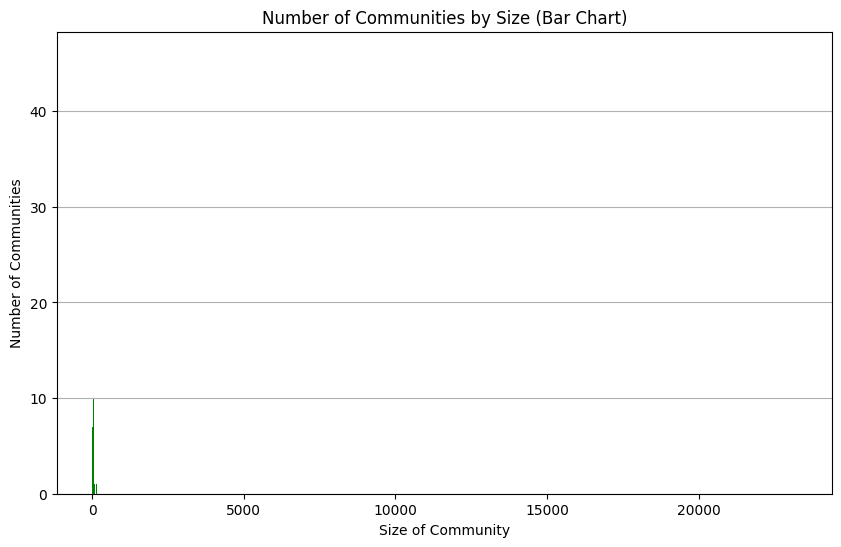

In [12]:
# Plotting the number of communities by their size using a bar chart for clearer visualization
plt.figure(figsize=(10, 6))
plt.bar(sorted_sizes, counts, color='green')
plt.xlabel('Size of Community')
plt.ylabel('Number of Communities')
plt.title('Number of Communities by Size (Bar Chart)')
plt.grid(axis='y')
plt.show()

## Machine Learning Approaches

In [16]:
G = nx.read_edgelist('../data/stanford/web-Stanford.txt', create_using=nx.DiGraph())

node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

Generating walks (CPU: 3): 100%|██████████| 50/50 [52:09<00:00, 62.59s/it]


Estimated number of clusters: 1
Estimated number of noise points: 281882
Silhouette Coefficient: -0.010


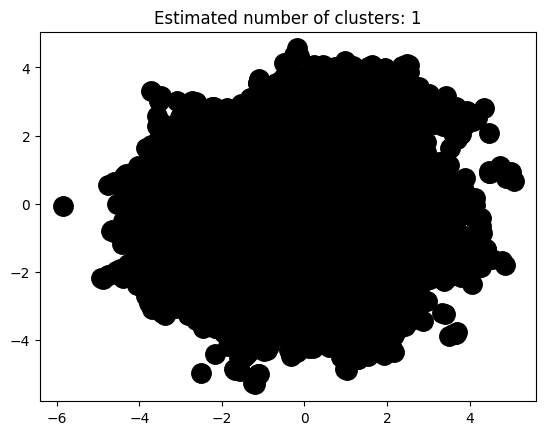

In [17]:
# save model
model.wv.save_word2vec_format('node2vec.model')

# compute embeddings and save them
embeddings = model.wv.vectors
np.save('node2vec_embeddings.npy', embeddings)

# use DBSCAN to detect communities

X = StandardScaler().fit_transform(embeddings)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Estimated number of clusters: 10
Estimated number of noise points: 0
Silhouette Coefficient: 0.055


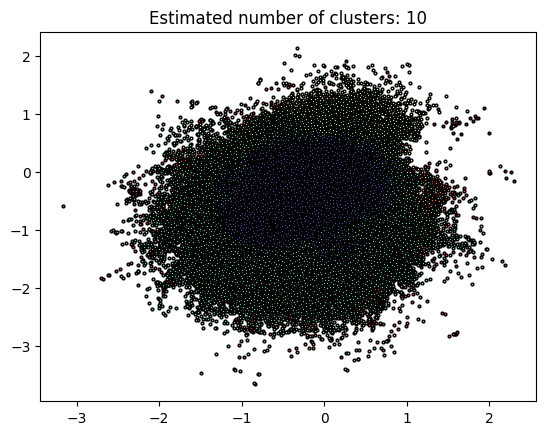

In [3]:
# Load embeddings
embeddings = np.load('node2vec_embeddings.npy')

# Use kmeans to detect communities
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(embeddings, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = embeddings[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [10]:
from sklearn.cluster import KMeans

def obtain_kmeans(G, embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)
    labels = kmeans.labels_
    return labels

In [ ]:
def train(model, data, optimizer, epochs=1000, verbose=False):
    model.train(epochs=epochs, verbose=verbose)
    optimizer.zero_grad()
    adj_logits = model(data.x, data.edge_index)
    loss = binary_cross_entropy(adj_logits.view(-1), data.adj.view(-1))

In [3]:
G2 = nx.read_edgelist('../data/facebook/0.edges')
node2vec_fb = Node2Vec(G2, dimensions=64, walk_length=30, num_walks=200, workers=4)
model_fb = node2vec_fb.fit(window=10, min_count=1, batch_words=4)
model_fb.wv.save_word2vec_format('node2vec_fb.model')
embeddings_fb = model_fb.wv.vectors
np.save('node2vec_embeddings_fb.npy', embeddings_fb)

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:02<00:00, 23.18it/s]


In [4]:
# Show some statistics about G2
print(f"Number of nodes: {G2.number_of_nodes()}")
print(f"Number of edges: {G2.number_of_edges()}")


Number of nodes: 333
Number of edges: 2519


In [17]:
from networkx.algorithms import community
# louvain 
from community import community_louvain

# Louvain
partition = community_louvain.best_partition(G2)
modularity = community_louvain.modularity(partition, G2)
print(f'Modularity of the graph with the Louvain method: {modularity}')
print(f'Number of communities detected by the Louvain method: {len(set(partition.values()))}')
print(f'Number of nodes in the largest community: {max(Counter(partition.values()).values())}'
        f' (out of {len(G2.nodes())} nodes)')   

# KMeans
n_cluster = len(set(partition.values()))
labels = obtain_kmeans(G2, embeddings_fb, n_cluster)

# Create a dictionary that maps nodes to their clusters
node_list = list(G2.nodes())
node_to_cluster = {node: label for node, label in zip(node_list, labels)}

# Invert the mapping to group nodes by their cluster
clusters = {}
for node, cluster_label in node_to_cluster.items():
    if cluster_label not in clusters:
        clusters[cluster_label] = [node]
    else:
        clusters[cluster_label].append(node)

# Convert the clusters dictionary to a list of lists for the modularity function
clusters_list = list(clusters.values())

# Calculate modularity
# Note: The `community.modularity` function expects a partition as a list of sets of nodes.
clusters_sets = [set(cluster) for cluster in clusters_list]
modularity = community.modularity(G2, clusters_sets)

print(f'Modularity of the graph with the obtained clusters: {modularity}')
print(f'Number of communities detected by the KMeans method: {len(clusters_list)}')
print(f'Number of nodes in the largest community: {max(len(cluster) for cluster in clusters_list)}'
        f' (out of {len(G2.nodes())} nodes)')


Modularity of the graph with the Louvain method: 0.45693034643734215
Number of communities detected by the Louvain method: 14
Number of nodes in the largest community: 79 (out of 333 nodes)


/home/jose/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Modularity of the graph with the obtained clusters: -0.014932798937680626
Number of communities detected by the KMeans method: 14
Number of nodes in the largest community: 153 (out of 333 nodes)


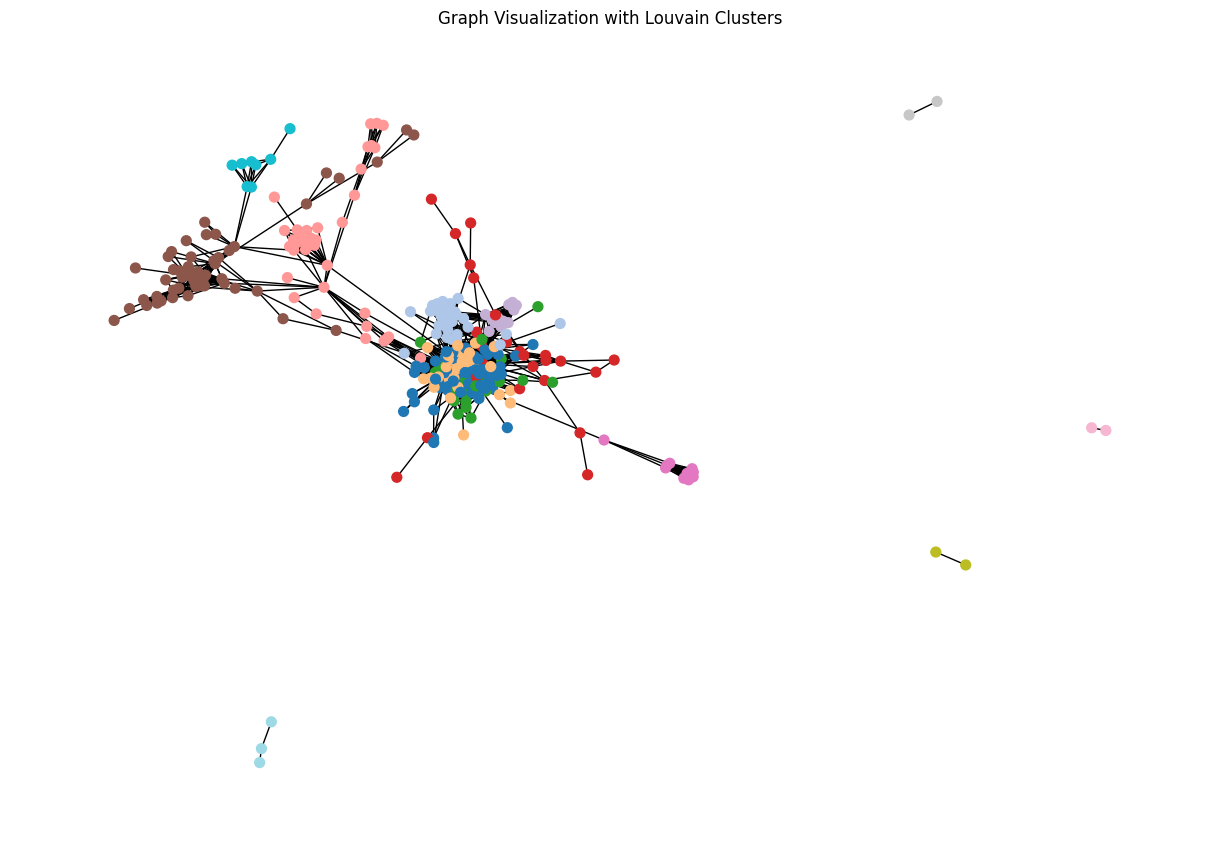

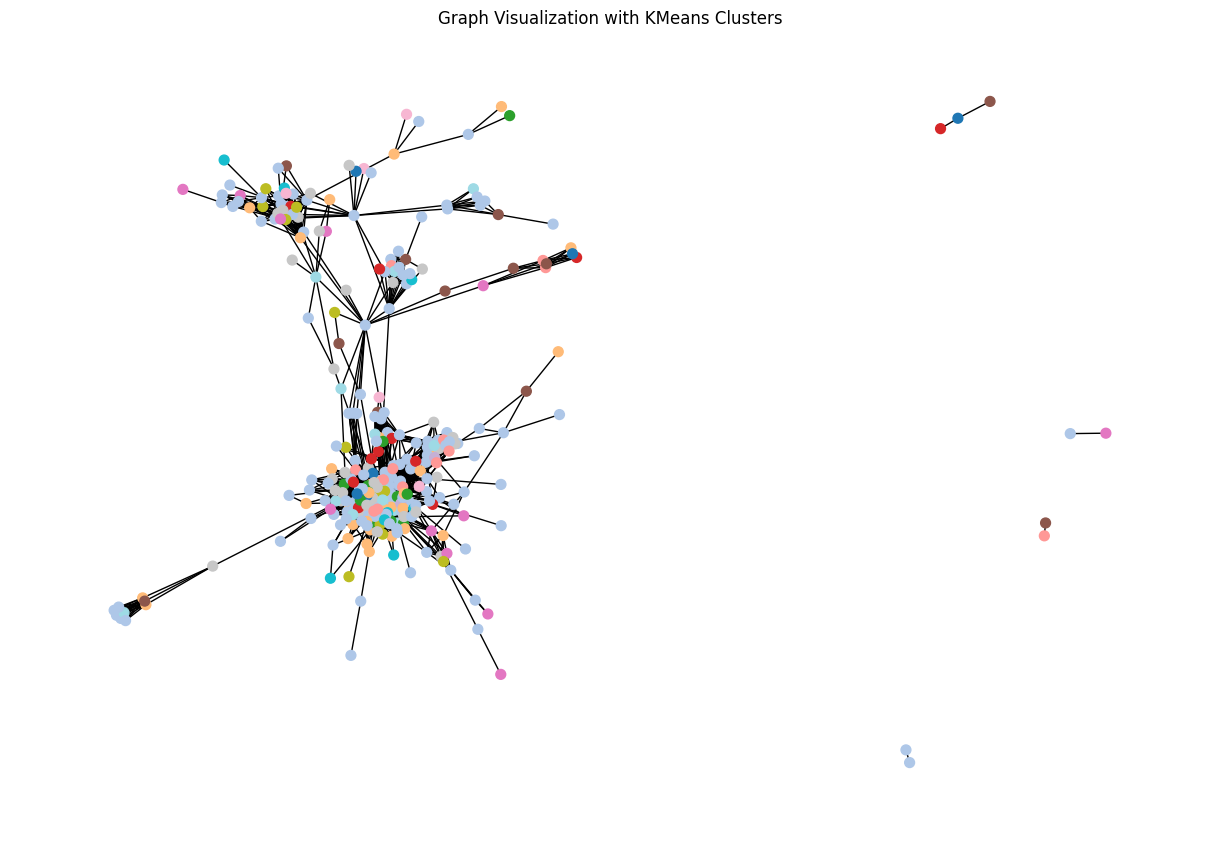

In [18]:
# Visualize the graph with each node colored by its cluster for both the Louvain and KMeans methods
# Louvain
plt.figure(figsize=(12, 8))
nx.draw(G2, pos=nx.spring_layout(G2), node_color=list(partition.values()), cmap='tab20', node_size=50)
plt.title('Graph Visualization with Louvain Clusters')
plt.show()

# KMeans
plt.figure(figsize=(12, 8))
nx.draw(G2, pos=nx.spring_layout(G2), node_color=labels, cmap='tab20', node_size=50)
plt.title('Graph Visualization with KMeans Clusters')
plt.show()

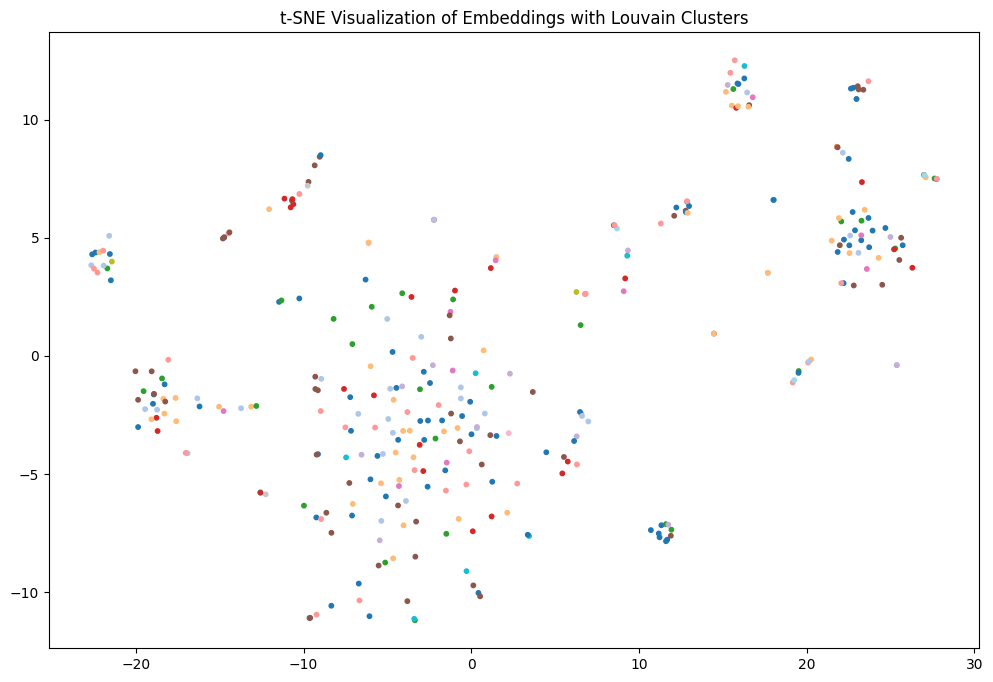

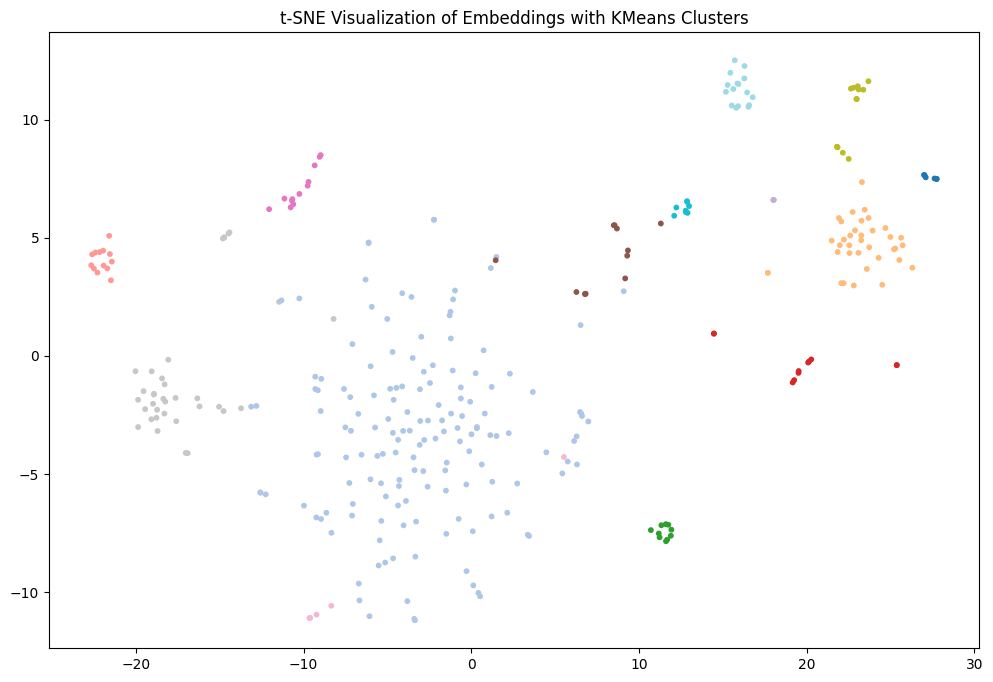

In [20]:
# Visualize the same, but in the embedding space, using the 2D t-SNE projection
from sklearn.manifold import TSNE

# Project the embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings_fb)

# Louvain
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=list(partition.values()), cmap='tab20', s=10)
plt.title('t-SNE Visualization of Embeddings with Louvain Clusters')
plt.show()

# KMeans
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab20', s=10)
plt.title('t-SNE Visualization of Embeddings with KMeans Clusters')
plt.show()